In [1]:
from pocket_cube.cube import Cube
from pocket_cube.cube import Move

%matplotlib inline

# Creating a scrambled cube 

In [2]:
cube = Cube("F' R U R U F' U'")

## 2D Cube visualization 

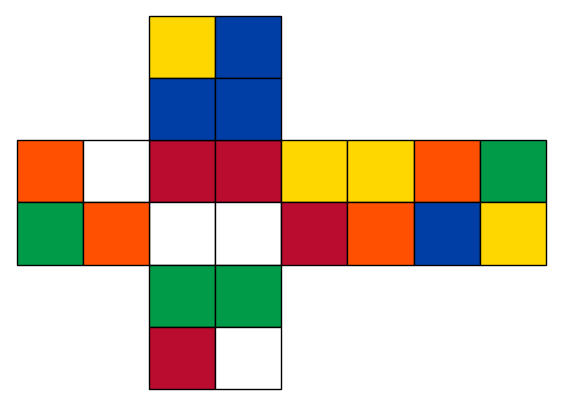

In [3]:
cube.render()

## Text representation 

In [4]:
cube.render_text()
print("\n")
cube2 = Cube(scrambled=False)
cube2.render_text()

  YB
  BB
OWRRYYOG
GOWWROBY
  GG
  RW


  YY
  YY
OOBBRRGG
OOBBRRGG
  WW
  WW


## 3D Cube visualization

For an interactive view of the cube, don't forget to use `%matplotlib notebook`

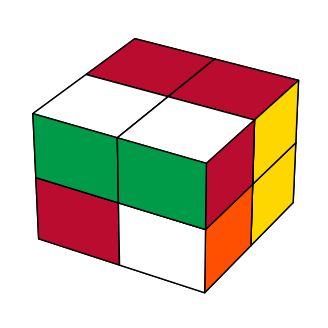

In [5]:
cube.render3D()

# Creating an unscrambled cube 

In [6]:
cube = Cube(scrambled=False)

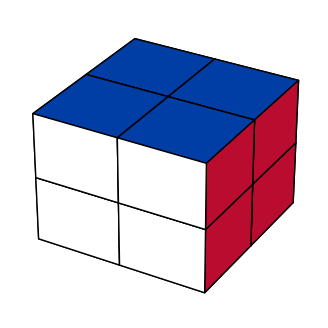

In [7]:
cube.render3D()

## Applying moves on the cube 

In [8]:
cube = cube.move(Move.R)
cube = cube.move(Move.F)

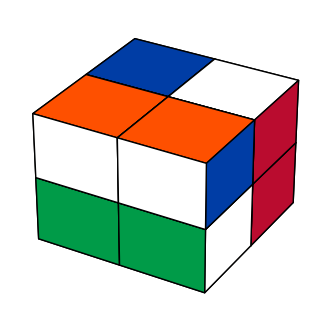

In [9]:
cube.render3D()

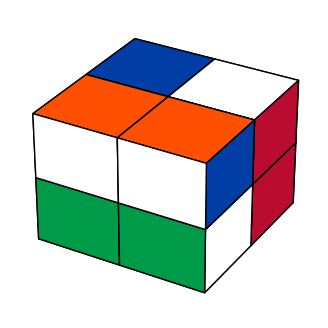

/home/diana/.local/lib/python3.8/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


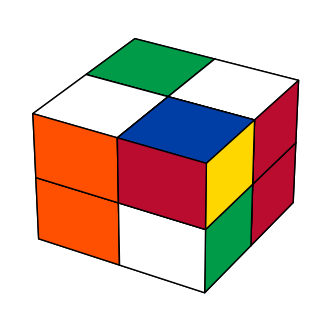

In [10]:
cube.render3D_moves(cube.state, [Move.Fp, Move.Rp])

cube3 = Cube("R U' R' F' U")
cube3.render3D()

3.1 Cerint,a 1: A*s,i Bidirectional BFS
Pocket Cube are aproape 3.7 ×106 st ̆ari posibile. Pentru a putea gestiona num ̆arul mare de st ̆ari, avem
dou ̆a variante: fie folosim un algoritm de c ̆autare informat, fie realiz ̆am o c ̆autare care construies,te
doar o parte din arborele de c ̆autare.
1. (1p) implementat,i o funct,ie euristic ̆a h1 (admisibil ̆a!) pe care s ̆a o folosit,i ˆın algoritmul A*, care
s ̆a permit ̆a rezolvarea cazurilor de test ˆıntr-un timp decent (10s pentru un caz de test).

87
Cube solved in 5 moves: [5, 1, 0, 2, 3]


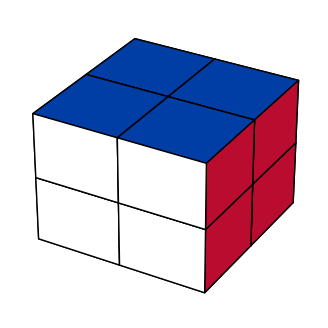

In [11]:
import numpy as np
from pocket_cube.cube import Cube
import heapq

def heuristic_h1(cube):
    cube_state = cube.state
    goal_state = Cube(scrambled=False).state
    misplaced_tiles = np.count_nonzero(cube_state != goal_state)
    return misplaced_tiles/8

def is_solved(cube: Cube) -> bool:
    solved_cube = Cube(scrambled=False)
    return np.array_equal(cube.state, solved_cube.state)

class CubeWrapper:
    def __init__(self, cube):
        self.cube = cube
    
    def __lt__(self, other):
        return True

def solve_a_star(initial_cube: Cube, heuristic_f) -> list:
    visited = set()
    frontier = [(0, CubeWrapper(initial_cube), [])] 
    visited_cost = {initial_cube.hash(): 0} 

    while frontier:
        _, current_cube_wrapper, moves = heapq.heappop(frontier)
        current_cube = current_cube_wrapper.cube

        if is_solved(current_cube):
            print(len(visited))
            return moves

        current_hash = current_cube.hash()
        if current_hash in visited:
            continue
        
        visited.add(current_hash)

        for move in range(6):
            next_cube = current_cube.move(move)
            next_hash = next_cube.hash()
            total_cost = len(moves) + 1 + heuristic_f(next_cube)
            
            if next_hash not in visited or total_cost < visited_cost.get(next_hash, float('inf')):
                visited_cost[next_hash] = total_cost
                heapq.heappush(frontier, (total_cost, CubeWrapper(next_cube), moves + [move]))
    
    return None

if __name__ == "__main__":
    initial_cube = Cube("R U' R' F' U")
    solution = solve_a_star(initial_cube, heuristic_h1)

    if solution:
        print("Cube solved in", len(solution), "moves:", solution)
        for move in solution:
            initial_cube = initial_cube.move(move) 
        initial_cube.render3D()
    else:
        print("Solution not found")


2. (2p) implementat,i o c ̆autare de tip BFS bidirect,ional, dup ̆a principiul:
•pornesc dou ̆a c ̆aut ̆ari simultane, de la starea init,ial ̆a s,i de la starea final ̆a
•fiecare c ̆autare este o c ̆autare pe l ̆at,ime
•ˆın momentul ˆın care exist ̆a o stare pe care au descoperit-o ambele c ̆aut ̆ari, se poate construi
un drum de la starea init,ial ̆a la cea final ̆

Cube solved in 11 moves: [2, 1, 3, 1, 1, 0, 1, 3, 2, 3, 5]


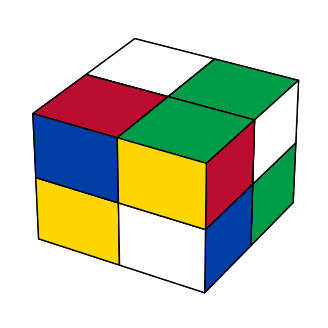

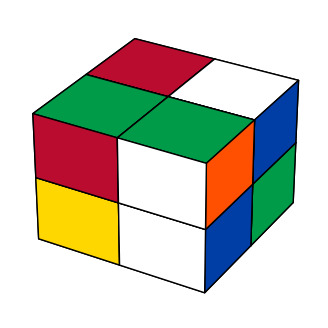

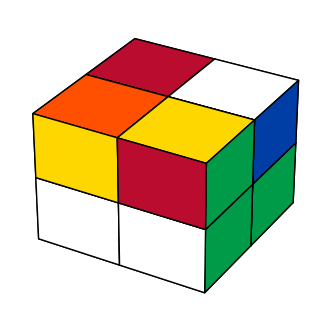

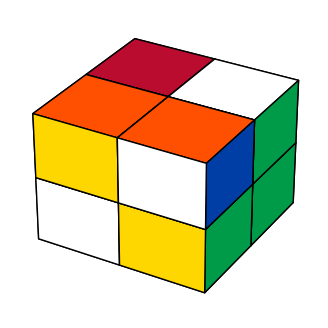

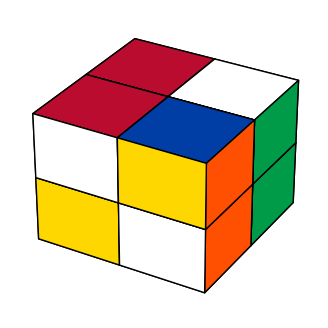

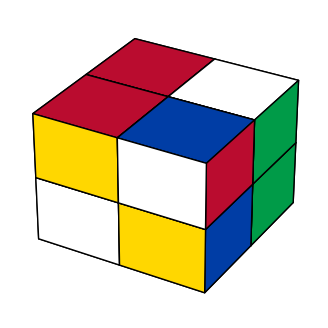

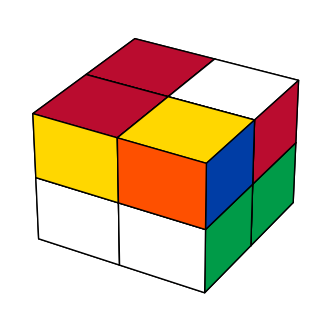

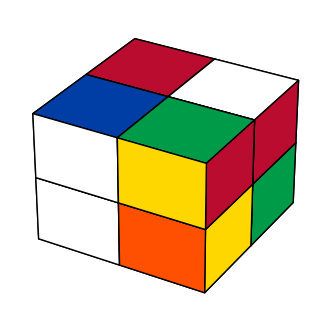

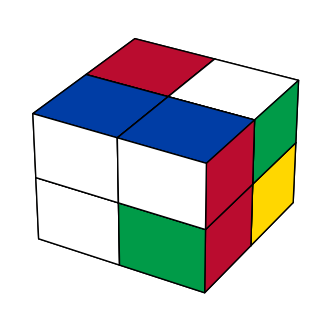

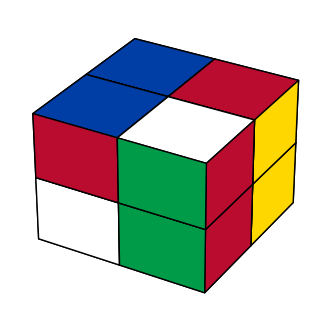

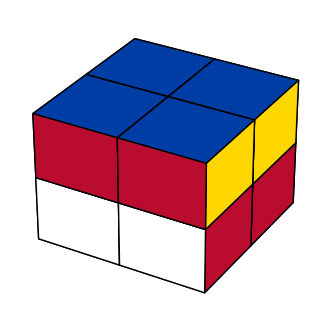

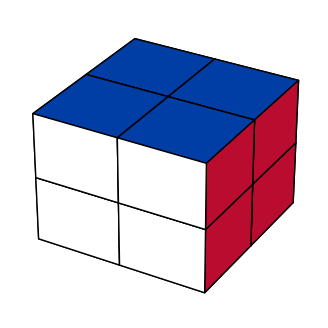

In [12]:
import numpy as np
from pocket_cube.cube import Cube
from collections import deque

def bidirectional_bfs(initial_cube: Cube, goal_cube: Cube) -> list:
    forward_queue = deque([initial_cube])
    backward_queue = deque([goal_cube])

    forward_visited = {initial_cube.hash(): None}
    backward_visited = {goal_cube.hash(): None}

    common_state = None

    while forward_queue and backward_queue:
        current_forward = forward_queue.popleft()
        next_hash = current_forward.hash()

        if next_hash in backward_visited:
            common_state = current_forward
            break

        for move in range(6):
            next_cube = current_forward.move(move)
            next_hash = next_cube.hash()
            if next_hash not in forward_visited:
                forward_queue.append(next_cube)
                forward_visited[next_hash] = (current_forward, move)

        if common_state:
            break

        current_backward = backward_queue.popleft()
        next_hash = current_backward.hash()

        if next_hash in forward_visited:
            common_state = current_backward
            break

        for move in range(6):
            next_cube = current_backward.move(move)
            next_hash = next_cube.hash()
            if next_hash not in backward_visited:
                backward_queue.append(next_cube)
                backward_visited[next_hash] = (current_backward, move)

        if common_state:
            break

    if common_state:
        moves_to_common = []
        current_cube = common_state

        while current_cube:
            if forward_visited[current_cube.hash()]:
                (current_cube, move) = forward_visited[current_cube.hash()]
                moves_to_common.append(move)
            else:
                break
        
        moves_to_common = list(reversed(moves_to_common))

        current_cube = common_state
        backward_moves = []
        
        # trebuie sa construim calea asa : forawrd visited + reverse (bacward visited)
        while current_cube:
            if backward_visited[current_cube.hash()]:
                (current_cube, move) = backward_visited[current_cube.hash()]
                backward_moves.append(Move.from_int(move).opposite().value)
            else:
                break

        moves_to_common.extend(backward_moves)
        #print("Visited " + str(len(forward_visited) + len(backward_visited)))
        return moves_to_common


    return None, None

if __name__ == "__main__":
    initial_cube = Cube("U' R U' F' R F F U' F U U")
    goal_cube = Cube(scrambled=False)

solution = bidirectional_bfs(initial_cube, goal_cube)

if solution:
    print("Cube solved in", len(solution), "moves:", solution)
    cube = initial_cube
    cube.render3D()

    for move in solution:
        cube = cube.move(move)
        cube.render3D()
else:
    print("No solution found within the maximum depth limit!")




3. (2p) realizat,i o comparat,ie folosind grafice elocvente (e.g. bar charts) ˆıntre algoritmul A* s,i
bidirectional BFS.
•Comparat,i timpul de execut,ie, num ̆arul de st ̆ari descoperite, s,i lungimea c ̆aii pˆan ̆a la solut,ie.
•Comparat,i folosind cazurile de test date.
•Ad ̆augat,i comentarii personale despre rezultatul comparat,iei.

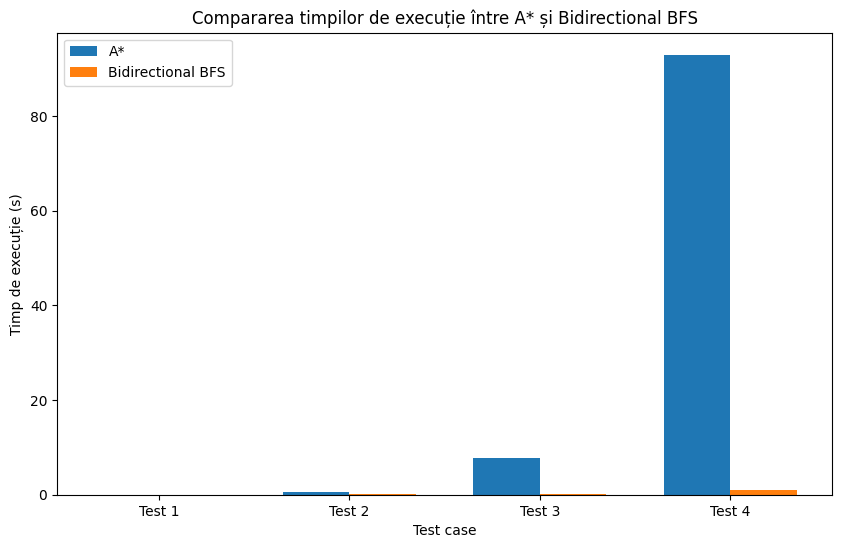

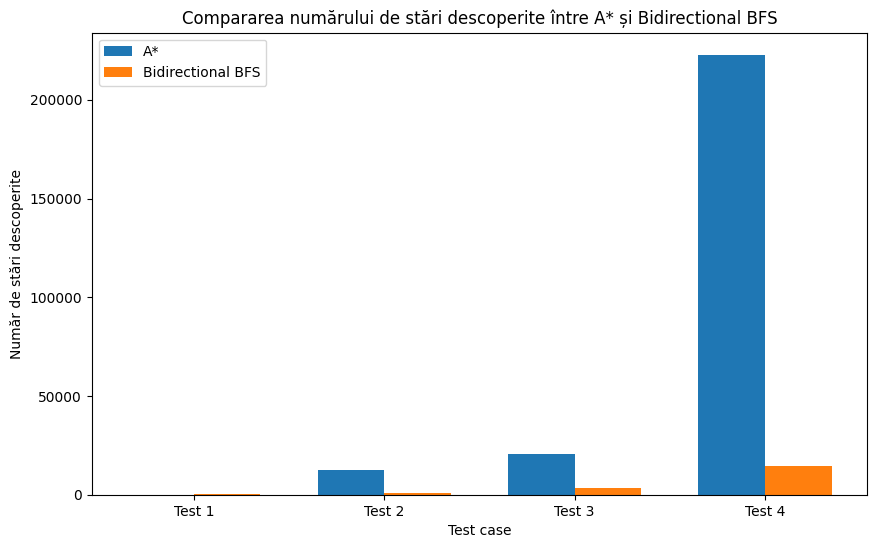

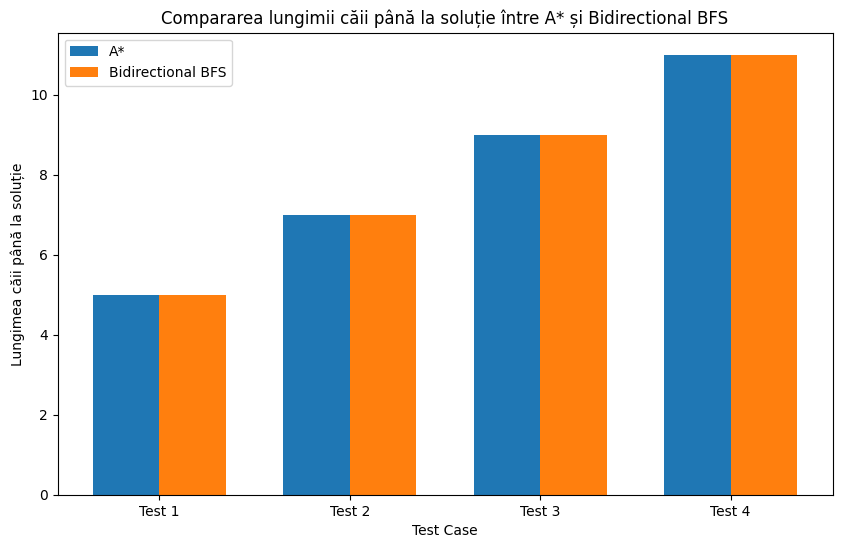

In [13]:
import matplotlib.pyplot as plt
test_names = ['Test 1', 'Test 2', 'Test 3', 'Test 4']

# Grafic 1: Timp de executie
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(test_names))

a_time = [0, 0.5, 7.8, 93]
bfs_time = [0, 0.1, 0.2, 1]
a_visited_nodes = [85, 12727, 20752, 222855]
bfs_visited_nodes = [282, 1079, 3202, 14336]
a_drum = [5, 7, 9, 11]
bfs_drum = [5, 7, 9, 11]

plt.bar(index, a_time, bar_width, label='A*')
plt.bar(index + bar_width, bfs_time, bar_width, label='Bidirectional BFS')

plt.xlabel('Test case')
plt.ylabel('Timp de execuție (s)')
plt.title('Compararea timpilor de execuție între A* și Bidirectional BFS')
plt.xticks(index + bar_width / 2, test_names)
plt.legend()
plt.show()

# Grafic 2: Numărul de stări descoperite
plt.figure(figsize=(10, 6))

plt.bar(index, a_visited_nodes, bar_width, label='A*')
plt.bar(index + bar_width, bfs_visited_nodes, bar_width, label='Bidirectional BFS')

plt.xlabel('Test case')
plt.ylabel('Număr de stări descoperite')
plt.title('Compararea numărului de stări descoperite între A* și Bidirectional BFS')
plt.xticks(index + bar_width / 2, test_names)
plt.legend()
plt.show()

# Grafic 3: Lungimea Căii până la Soluție
plt.figure(figsize=(10, 6))

plt.bar(index, a_drum, bar_width, label='A*')
plt.bar(index + bar_width, bfs_drum, bar_width, label='Bidirectional BFS')

plt.xlabel('Test Case')
plt.ylabel('Lungimea căii până la soluție')
plt.title('Compararea lungimii căii până la soluție între A* și Bidirectional BFS')
plt.xticks(index + bar_width / 2, test_names)
plt.legend()
plt.show()


Putem observa ca, deoarece functia h1 este admisibila, avem aceeasi lungime a caii pana la solutie. 
Deoarece testul 1 este mai usor, ambele functii ruleaza repede, insa pe masura ce complexitatea solutiei creste, durata A* creste, si implicit numarul de stari pana la solutie.

1p) implementat,i o a doua funct,ie euristic ̆a h2, diferit ̆a de cea de la Cerint,a 1. Aceasta nu
trebuie neap ̆arat s ̆a fie admisibil ̆a

In [14]:
def heuristic_h2(cube):
    cube_state = cube.state
    goal_state = Cube(scrambled=False).state
    misplaced_tiles = np.count_nonzero(cube_state != goal_state)
    return misplaced_tiles

2p) implementat,i MCTS as,a cum este descris mai sus, folosind euristica de la Cerint,a 1. Notat,i
c ̆a la MCTS este nevoie ca recompensa s ̆a fie mai mare mai aproape de starea final ̆a, iar euristicile
estimeaz ̆a costul pˆan ̆a la starea final ̆a.
3


In [101]:

from random import choice
from math import sqrt, log
import time
N = 'N'
Q = 'Q'
PARENT = 'parent'
ACTIONS = 'actions'
PLAYER = 'player'
CP = 0.5
MAX_STATES_EXPLORED = 14
def apply_action(cube, move):
    return cube.move(move)

def is_final(cube):
    solved_cube = Cube(scrambled=False)
    if cube.hash() == solved_cube.hash():
        return True
    return False

def get_available_actions(last_action):
    
    actions_list = list(range(6))
    if(last_action == -1):
        return actions_list
    
    opposite_action_value = Move.from_int(last_action).opposite().value

    if opposite_action_value in actions_list:
        actions_list.remove(opposite_action_value)
        modified_list = actions_list[:]
    return modified_list
    
def select_action(node, c = CP):
    """
    Se caută acțiunea a care maximizează expresia:
    Q_a / N_a  +  c * sqrt(2 * log(N_node) / N_a)
    """
    N_node = node[N]
    max_score = -1
    best_action = None

    for a, n in node[ACTIONS].items():
        crt_score = n[Q] / n[N] + c * sqrt(2 * log(N_node) / n[N])

        if max_score < crt_score:
            max_score = crt_score
            best_action = a

    return best_action


def create_node(parent=None, action=None, state=None):
    return {
        N: 0,
        Q: 0.0,
        PARENT: parent,
        ACTIONS: {}
    }

def mcts(initial, budget, tree=None, heuristic=heuristic_h1):
    visited_states = set()
    reward = 0
    
    if tree is None:
        tree = create_node(state=initial)
    
    for _ in range(budget):
        cube = initial
        node = tree
        last_action = -1
        
        while not is_final(cube) and all(action in node[ACTIONS] for action in get_available_actions(last_action)):
            new_action = select_action(node, CP)
            last_action = new_action
            cube = apply_action(cube, new_action)
            node = node[ACTIONS][new_action]

            cube_hash = cube.hash()
            if cube_hash in visited_states:
                continue  # Ne oprim daca am mai vizitat starea pentru a evita bucle
            visited_states.add(cube_hash)
        
        if not is_final(cube):
            new_action = choice(list(filter(lambda a: a not in node[ACTIONS], get_available_actions(last_action))))
            last_action = new_action
            cube = apply_action(cube, new_action)
            node = create_node(node)
            node[PARENT][ACTIONS][new_action] = node
	    
        states_explored = 0
        min_heuristic = heuristic(cube)

        while not is_final(cube) and states_explored < MAX_STATES_EXPLORED:
            av_actions = get_available_actions(last_action)
            random_action = choice(av_actions)
            cube = apply_action(cube, random_action)
            last_action = random_action
            if(heuristic(cube) < min_heuristic):
                min_heuristic = heuristic(cube)
            states_explored += 1
        if(is_solved(cube) or min_heuristic == 0):
            reward = 1
        else: reward = 1/min_heuristic
        while node:
            node[N] += 1
            node[Q] += reward 
            node = node[PARENT]

    final_action = select_action(tree, 0.0) if tree[ACTIONS] else None
    final_tree = tree if tree[ACTIONS] else None
    return final_action, final_tree, visited_states

def play_game(budget, game, heuristic=heuristic_h1):
    cube = Cube(game)
    print(cube.state)
    steps = 0
    total_states = set()
    
    while not is_final(cube):
        #if steps < 20:
            action, _, states = mcts(cube, budget, None, heuristic) 
            cube = apply_action(cube, action)
            steps = steps + 1
            for state_elem in states:
                total_states.add(state_elem)
       # else: break

    return steps, len(total_states)


def collect_data(heuristic):
    budget_list = [1000, 5000, 10000, 20000]
    cp_list = [0.5, 0.1]
    game_list = ["R U' R' F' U", "F' R U R U F' U'", "F U U F' U' R R F' R", "U' R U' F' R F F U' F U U"]
    time_array = {}
    for science_purpose in range(10):
        for game in game_list:
            for cp in cp_list:
                CP = cp
                for budget in budget_list:
                    start_time = time.time()
                    done = True
                    steps, states = play_game(budget, game, heuristic)
                    if(steps == 20):
                        done = False
                    time_array[time.time() - start_time] = [budget, cp, steps, states, done]
                    print(time_array)

    return time_array

#collect_data(heuristic_h2)
            

In [69]:
# datele culese conform cerintei 3, prin rularea a de 10 ori fiecare caz


data_h1 = {3.56: [1000, 0.5, 5, 285, True], 11.80: [5000, 0.5, 5, 696, True], 19.55: [10000, 0.5, 5, 696, True], 35.44: [20000, 0.5, 5, 695, True], 3.37: [1000, 0.1, 5, 287, True], 11.82: [5000, 0.1, 5, 694, True], 19.76: [10000, 0.1, 5, 693, True], 34.97: [20000, 0.1, 5, 693, True], 28.32: [1000, 0.5, 20, 1480, False], 24.67: [5000, 0.5, 7, 1824, True], 50.16: [10000, 0.5, 7, 4773, True], 88.45: [20000, 0.5, 7, 4657, True], 28.38: [1000, 0.1, 20, 1791, False], 26.7: [5000, 0.1, 7, 1873, True], 46.8: [10000, 0.1, 7, 4176, True], 88.9: [20000, 0.1, 7, 4773, True], 28.30: [1000, 0.5, 20, 1468, False], 40.68: [5000, 0.5, 9, 2916, True], 80.49: [10000, 0.5, 9, 8255, True], 145.9: [20000, 0.5, 9, 8184, True],27.8: [1000, 0.1, 20, 1420, False], 148.53: [5000, 0.1, 20, 6738, False], 79.29: [10000, 0.1, 9, 8148, True], 145.4: [20000, 0.1, 9, 7230, True], 28.338: [1000, 0.5, 20, 2035, False], 148.0: [5000, 0.5, 20, 8543, False], 308.57: [10000, 0.5, 20, 20706, False], 625.94: [20000, 0.5, 20, 19318, False],27.737: [1000, 0.1, 20, 1606, False], 153.18: [5000, 0.1, 20, 6252, False], 316.83: [10000, 0.1, 20, 19307, False], 662.71: [20000, 0.1, 20, 19310, False],27.93611240386963: [1000, 0.5, 20, 881, False], 11.257181644439697: [5000, 0.5, 5, 694, True], 18.6002459526062: [10000, 0.5, 5, 531, True], 35.46896982192993: [20000, 0.5, 5, 694, True], 28.314229488372803: [1000, 0.1, 20, 1038, False], 9.892826080322266: [5000, 0.1, 5, 264, True], 18.087788581848145: [10000, 0.1, 5, 557, True], 35.29110670089722: [20000, 0.1, 5, 695, True],28.01621389389038: [1000, 0.5, 20, 1660, False], 25.99591064453125: [5000, 0.5, 7, 1853, True], 50.684977531433105: [10000, 0.5, 7, 4770, True], 87.22307276725769: [20000, 0.5, 7, 4756, True],28.339326858520508: [1000, 0.1, 20, 2262, False], 25.962140798568726: [5000, 0.1, 7, 1827, True], 50.483110666275024: [10000, 0.1, 7, 4771, True], 88.57297849655151: [20000, 0.1, 7, 4769, True], 27.65386390686035: [1000, 0.5, 20, 1742, False], 147.59310483932495: [5000, 0.5, 20, 6487, False], 305.59159564971924: [10000, 0.5, 20, 21418, False], 614.3938598632812: [20000, 0.5, 20, 20580, False], 27.617172241210938: [1000, 0.1, 20, 1877, False], 40.2443585395813: [5000, 0.1, 9, 2916, True], 310.557017326355: [10000, 0.1, 20, 22692, False], 145.5492422580719: [20000, 0.1, 9, 7712, True], 27.93396782875061: [1000, 0.5, 20, 1894, False], 147.9167718887329: [5000, 0.5, 20, 7419, False], 319.4962284564972: [10000, 0.5, 20, 29252, False], 614.0774431228638: [20000, 0.5, 20, 19311, False], 26.991204500198364: [1000, 0.1, 20, 2100, False], 148.8974039554596: [5000, 0.1, 20, 6244, False], 303.1609194278717: [10000, 0.1, 20, 22255, False], 613.2122032642365: [20000, 0.1, 20, 19316, False], 27.75648784637451: [1000, 0.5, 20, 1150, False], 11.403069257736206: [5000, 0.5, 5, 694, True], 20.101646661758423: [10000, 0.5, 5, 693, True], 34.50114917755127: [20000, 0.5, 5, 555, True], 28.347988605499268: [1000, 0.1, 20, 1182, False], 11.74049425125122: [5000, 0.1, 5, 695, True], 20.93336796760559: [10000, 0.1, 5, 694, True], 35.80504822731018: [20000, 0.1, 5, 695, True], 8.74017882347107: [1000, 0.5, 9, 668, True], 146.9471206665039: [5000, 0.5, 20, 9221, False], 79.64784717559814: [10000, 0.5, 9, 7835, True], 83.2611870765686: [20000, 0.5, 7, 3517, True], 9.050277948379517: [1000, 0.1, 9, 801, True], 27.25834631919861: [5000, 0.1, 7, 1846, True], 50.56995511054993: [10000, 0.1, 7, 4770, True], 92.58157420158386: [20000, 0.1, 7, 4775, True], 27.873756408691406: [1000, 0.5, 20, 1620, False], 40.30626153945923: [5000, 0.5, 9, 2948, True], 304.59739780426025: [10000, 0.5, 20, 11338, False], 619.7217762470245: [20000, 0.5, 20, 14776, False], 28.169278621673584: [1000, 0.1, 20, 1480, False], 149.94316291809082: [5000, 0.1, 20, 7530, False], 74.85819435119629: [10000, 0.1, 9, 7658, True], 617.5122396945953: [20000, 0.1, 20, 21427, False], 28.404672145843506: [1000, 0.5, 20, 1951, False], 148.34088802337646: [5000, 0.5, 20, 6589, False], 305.1938064098358: [10000, 0.5, 20, 20706, False], 620.4462132453918: [20000, 0.5, 20, 19322, False], 27.896158456802368: [1000, 0.1, 20, 1855, False], 144.81099581718445: [5000, 0.1, 20, 8159, False], 304.3255479335785: [10000, 0.1, 20, 20706, False], 615.137717962265: [20000, 0.1, 20, 19311, False], 3.2970502376556396: [1000, 0.5, 5, 257, True], 10.82203483581543: [5000, 0.5, 5, 693, True], 19.065775632858276: [10000, 0.5, 5, 572, True], 35.182443380355835: [20000, 0.5, 5, 694, True], 3.445814609527588: [1000, 0.1, 5, 283, True], 12.15757703781128: [5000, 0.1, 5, 693, True], 20.239182233810425: [10000, 0.1, 5, 694, True], 35.282694816589355: [20000, 0.1, 5, 697, True],28.210516691207886: [1000, 0.5, 20, 1570, False], 149.53746390342712: [5000, 0.5, 20, 6012, False], 305.1835262775421: [10000, 0.5, 20, 20836, False], 90.34679889678955: [20000, 0.5, 7, 4775, True], 28.291248559951782: [1000, 0.1, 20, 1657, False], 147.97785639762878: [5000, 0.1, 20, 6776, False], 50.314706563949585: [10000, 0.1, 7, 4770, True], 93.2172303199768: [20000, 0.1, 7, 4773, True], 27.79051899909973: [1000, 0.5, 20, 1847, False], 99.61194729804993: [5000, 0.5, 17, 5615, True], 303.48130893707275: [10000, 0.5, 20, 25495, False], 145.38489031791687: [20000, 0.5, 9, 7477, True], 27.761842250823975: [1000, 0.1, 20, 1323, False], 148.96706986427307: [5000, 0.1, 20, 7097, False], 76.15513443946838: [10000, 0.1, 9, 7594, True], 145.09110736846924: [20000, 0.1, 9, 7550, True], 28.243531942367554: [1000, 0.5, 20, 1749, False], 148.88284730911255: [5000, 0.5, 20, 6596, False], 307.86153531074524: [10000, 0.5, 20, 19307, False], 620.5240354537964: [20000, 0.5, 20, 19318, False], 27.858630180358887: [1000, 0.1, 20, 2368, False], 147.27237200737: [5000, 0.1, 20, 6987, False], 305.25857877731323: [10000, 0.1, 20, 21453, False], 625.7129936218262: [20000, 0.1, 20, 19316, False], 27.97415590286255: [1000, 0.5, 20, 1202, False], 10.57982325553894: [5000, 0.5, 5, 595, True], 20.291608095169067: [10000, 0.5, 5, 695, True], 35.43321394920349: [20000, 0.5, 5, 694, True], 3.3625597953796387: [1000, 0.1, 5, 294, True], 12.310243606567383: [5000, 0.1, 5, 693, True], 20.24860429763794: [10000, 0.1, 5, 693, True], 36.4755175113678: [20000, 0.1, 5, 693, True], 27.992600202560425: [1000, 0.5, 20, 1408, False], 149.2118377685547: [5000, 0.5, 20, 7659, False], 49.17777490615845: [10000, 0.5, 7, 4772, True], 95.89648032188416: [20000, 0.5, 7, 4771, True], 5.963620662689209: [1000, 0.1, 7, 544, True], 147.5700364112854: [5000, 0.1, 20, 5487, False], 77.15417242050171: [10000, 0.1, 9, 7780, True], 620.5928287506104: [20000, 0.1, 20, 17394, False], 28.16249942779541: [1000, 0.5, 20, 1435, False], 147.26664113998413: [5000, 0.5, 20, 5513, False],81.10740256309509: [10000, 0.5, 9, 8257, True], 143.4028513431549: [20000, 0.5, 9, 7483, True],8.850102186203003: [1000, 0.1, 9, 803, True], 54.935489654541016: [5000, 0.1, 11, 3848, True], 78.29526972770691: [10000, 0.1, 9, 8216, True], 144.58828830718994: [20000, 0.1, 9, 7702, True], 28.123555421829224: [1000, 0.5, 20, 1982, False], 149.48358750343323: [5000, 0.5, 20, 6733, False], 305.0223243236542: [10000, 0.5, 20, 19307, False], 621.336273431778: [20000, 0.5, 20, 19316, False],28.17799997329712: [1000, 0.1, 20, 1925, False], 149.09488654136658: [5000, 0.1, 20, 6429, False], 302.9899814128876: [10000, 0.1, 20, 19307, False], 617.8205502033234: [20000, 0.1, 20, 19312, False],3.1978416442871094: [1000, 0.5, 5, 294, True], 11.77434229850769: [5000, 0.5, 5, 694, True], 20.630370378494263: [10000, 0.5, 5, 694, True], 34.68904209136963: [20000, 0.5, 5, 530, True],3.2196929454803467: [1000, 0.1, 5, 289, True], 12.386796474456787: [5000, 0.1, 5, 695, True], 18.445071697235107: [10000, 0.1, 5, 574, True], 35.735743284225464: [20000, 0.1, 5, 695, True],28.210574865341187: [1000, 0.5, 20, 1919, False], 26.027477025985718: [5000, 0.5, 7, 1827, True], 49.37007999420166: [10000, 0.5, 7, 4769, True], 157.12335681915283: [20000, 0.5, 9, 8260, True], 28.23035192489624: [1000, 0.1, 20, 1451, False], 25.4084153175354: [5000, 0.1, 7, 1842, True], 198.890939950943: [10000, 0.1, 17, 17350, True], 87.60732913017273: [20000, 0.1, 7, 4774, True], 14.572702884674072: [1000, 0.5, 13, 1149, True], 149.16412806510925: [5000, 0.5, 20, 5505, False], 76.18088698387146: [10000, 0.5, 9, 7640, True], 146.7744655609131: [20000, 0.5, 9, 8200, True], 8.834549903869629: [1000, 0.1, 9, 791, True], 147.99396514892578: [5000, 0.1, 20, 5372, False], 76.27808618545532: [10000, 0.1, 9, 7679, True], 146.2274775505066: [20000, 0.1, 9, 7770, True], 27.935199737548828: [1000, 0.5, 20, 1808, False], 149.151921749115: [5000, 0.5, 20, 6522, False], 304.94653058052063: [10000, 0.5, 20, 20706, False], 623.4061346054077: [20000, 0.5, 20, 19317, False], 28.30228281021118: [1000, 0.1, 20, 1503, False], 147.99068188667297: [5000, 0.1, 20, 6558, False], 306.7114927768707: [10000, 0.1, 20, 19307, False], 620.7472860813141: [20000, 0.1, 20, 19313, False], 28.006841897964478: [1000, 0.5, 20, 1312, False], 10.191984415054321: [5000, 0.5, 5, 573, True], 19.19075608253479: [10000, 0.5, 5, 693, True], 35.297778844833374: [20000, 0.5, 5, 694, True], 28.448732137680054: [1000, 0.1, 20, 1061, False], 11.628907918930054: [5000, 0.1, 5, 693, True], 21.28611993789673: [10000, 0.1, 5, 694, True], 36.45816493034363: [20000, 0.1, 5, 693, True],8.201258420944214: [1000, 0.5, 9, 773, True], 24.366859674453735: [5000, 0.5, 7, 1697, True], 50.55993366241455: [10000, 0.5, 7, 4770, True], 82.5123860836029: [20000, 0.5, 7, 3386, True], 28.51477313041687: [1000, 0.1, 20, 1585, False], 149.3540015220642: [5000, 0.1, 20, 8554, False], 306.3895354270935: [10000, 0.1, 20, 23036, False], 83.61386060714722: [20000, 0.1, 7, 4101, True], 27.95704460144043: [1000, 0.5, 20, 1327, False], 114.29199314117432: [5000, 0.5, 19, 4969, True], 303.2929365634918: [10000, 0.5, 20, 16210, False], 144.83038306236267: [20000, 0.5, 9, 7015, True], 28.350700855255127: [1000, 0.1, 20, 1629, False], 38.68936014175415: [5000, 0.1, 9, 2706, True], 76.3704240322113: [10000, 0.1, 9, 7636, True], 622.7566409111023: [20000, 0.1, 20, 24652, False], 28.11573553085327: [1000, 0.5, 20, 1533, False], 150.80825686454773: [5000, 0.5, 20, 9080, False], 305.7059133052826: [10000, 0.5, 20, 19307, False], 620.4601709842682: [20000, 0.5, 20, 19311, False], 28.155959606170654: [1000, 0.1, 20, 1887, False], 147.44190120697021: [5000, 0.1, 20, 7938, False], 305.7520227432251: [10000, 0.1, 20, 19307, False], 623.6502628326416: [20000, 0.1, 20, 19317, False], 28.235507011413574: [1000, 0.5, 20, 1030, False], 11.787864685058594: [5000, 0.5, 5, 694, True], 20.004726886749268: [10000, 0.5, 5, 694, True], 34.27346706390381: [20000, 0.5, 5, 521, True], 3.398728609085083: [1000, 0.1, 5, 286, True], 11.454654932022095: [5000, 0.1, 5, 695, True], 19.46773624420166: [10000, 0.1, 5, 695, True], 34.41909980773926: [20000, 0.1, 5, 556, True], 9.008156299591064: [1000, 0.5, 9, 680, True], 147.7918620109558: [5000, 0.5, 20, 5989, False], 49.61786937713623: [10000, 0.5, 7, 4770, True], 88.14750027656555: [20000, 0.5, 7, 4774, True], 28.471171379089355: [1000, 0.1, 20, 1512, False], 26.075690269470215: [5000, 0.1, 7, 1780, True], 304.6908257007599: [10000, 0.1, 20, 24200, False], 84.71837019920349: [20000, 0.1, 7, 4148, True], 28.426265716552734: [1000, 0.5, 20, 1642, False], 148.84566617012024: [5000, 0.5, 20, 6762, False], 306.6560971736908: [10000, 0.5, 20, 19271, False], 146.67229628562927: [20000, 0.5, 9, 7822, True], 28.016047477722168: [1000, 0.1, 20, 1384, False], 40.29503583908081: [5000, 0.1, 9, 2983, True], 78.50938320159912: [10000, 0.1, 9, 8015, True], 613.2656226158142: [20000, 0.1, 20, 20582, False], 29.03714656829834: [1000, 0.5, 20, 1515, False], 148.73490357398987: [5000, 0.5, 20, 7609, False], 308.3965525627136: [10000, 0.5, 20, 19581, False], 626.9458026885986: [20000, 0.5, 20, 19315, False], 34.051483154296875: [1000, 0.1, 20, 1859, False], 149.4756886959076: [5000, 0.1, 20, 6307, False], 308.6758818626404: [10000, 0.1, 20, 20856, False], 623.4125235080719: [20000, 0.1, 20, 19317, False], 3.433366060256958: [1000, 0.5, 5, 287, True], 12.042464971542358: [5000, 0.5, 5, 694, True], 20.815236568450928: [10000, 0.5, 5, 694, True], 35.918911933898926: [20000, 0.5, 5, 693, True], 28.654885292053223: [1000, 0.1, 20, 1205, False], 11.038271188735962: [5000, 0.1, 5, 693, True], 19.798627376556396: [10000, 0.1, 5, 694, True], 35.785125970840454: [20000, 0.1, 5, 695, True], 29.097800731658936: [1000, 0.5, 20, 1253, False], 41.12933564186096: [5000, 0.5, 9, 2942, True], 80.65698432922363: [10000, 0.5, 9, 8255, True], 621.4967453479767: [20000, 0.5, 20, 23724, False], 27.86056613922119: [1000, 0.1, 20, 1816, False], 40.4209623336792: [5000, 0.1, 9, 2924, True], 75.99867177009583: [10000, 0.1, 9, 7663, True], 83.80007243156433: [20000, 0.1, 7, 4102, True], 27.96777319908142: [1000, 0.5, 20, 1779, False], 41.16393208503723: [5000, 0.5, 9, 2943, True], 138.83718585968018: [10000, 0.5, 13, 12939, True], 207.88281202316284: [20000, 0.5, 11, 10789, True], 28.79897451400757: [1000, 0.1, 20, 1556, False], 148.80861043930054: [5000, 0.1, 20, 5883, False], 110.22920870780945: [10000, 0.1, 11, 11419, True], 164.25591802597046: [20000, 0.1, 9, 8247, True], 30.848966598510742: [1000, 0.5, 20, 1524, False], 157.54126286506653: [5000, 0.5, 20, 8126, False], 311.235600233078: [10000, 0.5, 20, 19307, False], 625.9937019348145: [20000, 0.5, 20, 19314, False], 28.10355806350708: [1000, 0.1, 20, 1515, False], 148.7429699897766: [5000, 0.1, 20, 6309, False], 306.73466777801514: [10000, 0.1, 20, 23213, False], 621.5639600753784: [20000, 0.1, 20, 19315, False], 3.3341550827026367: [1000, 0.5, 5, 279, True], 11.893090009689331: [5000, 0.5, 5, 693, True], 19.7825927734375: [10000, 0.5, 5, 694, True], 36.32887268066406: [20000, 0.5, 5, 696, True], 3.5474414825439453: [1000, 0.1, 5, 276, True], 12.404317617416382: [5000, 0.1, 5, 694, True], 19.16273522377014: [10000, 0.1, 5, 577, True], 35.699461698532104: [20000, 0.1, 5, 694, True], 27.949825525283813: [1000, 0.5, 20, 1378, False], 39.9112503528595: [5000, 0.5, 9, 2855, True], 52.370179414749146: [10000, 0.5, 7, 4771, True], 89.03871369361877: [20000, 0.5, 7, 4773, True], 28.70853877067566: [1000, 0.1, 20, 1901, False], 25.59865117073059: [5000, 0.1, 7, 1763, True], 48.441182136535645: [10000, 0.1, 7, 4769, True], 146.4547576904297: [20000, 0.1, 9, 7781, True], 28.542465925216675: [1000, 0.5, 20, 1323, False], 40.664454221725464: [5000, 0.5, 9, 2916, True], 304.94473600387573: [10000, 0.5, 20, 18128, False], 143.6271107196808: [20000, 0.5, 9, 7979, True], 27.54359531402588: [1000, 0.1, 20, 1370, False], 147.46696209907532: [5000, 0.1, 20, 6763, False], 110.87849044799805: [10000, 0.1, 11, 11525, True], 148.40720319747925: [20000, 0.1, 9, 8260, True], 28.010727167129517: [1000, 0.5, 20, 2061, False], 146.67641258239746: [5000, 0.5, 20, 7753, False], 299.1785743236542: [10000, 0.5, 20, 18268, False], 610.5010952949524: [20000, 0.5, 20, 19314, False], 27.48228406906128: [1000, 0.1, 20, 1663, False], 149.03998947143555: [5000, 0.1, 20, 6287, False], 307.7416341304779: [10000, 0.1, 20, 19307, False], 609.6530339717865: [20000, 0.1, 20, 19312, False]}

data_h2 = {29.354453563690186: [1000, 0.5, 20, 985, False], 14.455582618713379: [5000, 0.5, 5, 909, True], 23.2636935710907: [10000, 0.5, 5, 929, True], 39.60962390899658: [20000, 0.5, 5, 920, True], 29.857367992401123: [1000, 0.1, 20, 1278, False], 14.201493978500366: [5000, 0.1, 5, 911, True], 23.77085828781128: [10000, 0.1, 5, 967, True], 38.42727971076965: [20000, 0.1, 5, 892, True], 28.51602840423584: [1000, 0.5, 20, 1739, False], 156.39719223976135: [5000, 0.5, 20, 7576, False], 342.67349672317505: [10000, 0.5, 20, 23296, False], 115.12300658226013: [20000, 0.5, 7, 5584, True], 28.127898693084717: [1000, 0.1, 20, 1414, False], 152.98442363739014: [5000, 0.1, 20, 7455, False], 52.1613404750824: [10000, 0.1, 7, 4204, True], 89.8818781375885: [20000, 0.1, 7, 5421, True], 15.443908214569092: [1000, 0.5, 13, 1514, True], 42.513150691986084: [5000, 0.5, 9, 3572, True], 313.1989121437073: [10000, 0.5, 20, 14215, False], 150.65435433387756: [20000, 0.5, 9, 10051, True], 18.708842754364014: [1000, 0.1, 15, 1745, True], 42.42054510116577: [5000, 0.1, 9, 3609, True], 171.40409660339355: [10000, 0.1, 15, 14503, True], 149.52540135383606: [20000, 0.1, 9, 10084, True], 28.200469255447388: [1000, 0.5, 20, 1717, False], 147.8545982837677: [5000, 0.5, 20, 6630, False], 303.0411903858185: [10000, 0.5, 20, 14585, False], 626.6036648750305: [20000, 0.5, 20, 21501, False], 27.297407865524292: [1000, 0.1, 20, 2230, False], 147.56180381774902: [5000, 0.1, 20, 6778, False], 305.73102045059204: [10000, 0.1, 20, 17895, False], 628.9272379875183: [20000, 0.1, 20, 21594, False], 27.850502014160156: [1000, 0.5, 20, 1085, False], 13.123474597930908: [5000, 0.5, 5, 905, True], 21.602484941482544: [10000, 0.5, 5, 987, True], 38.55334949493408: [20000, 0.5, 5, 1023, True], 28.047818899154663: [1000, 0.1, 20, 1206, False], 13.182032346725464: [5000, 0.1, 5, 892, True], 21.454667568206787: [10000, 0.1, 5, 933, True], 38.208698987960815: [20000, 0.1, 5, 1100, True], 28.353323698043823: [1000, 0.5, 20, 2044, False], 151.19826412200928: [5000, 0.5, 20, 7239, False], 51.8436381816864: [10000, 0.5, 7, 4120, True], 87.34564447402954: [20000, 0.5, 7, 5218, True], 28.741436004638672: [1000, 0.1, 20, 2266, False], 43.44485592842102: [5000, 0.1, 9, 3569, True], 80.8863275051117: [10000, 0.1, 9, 7170, True], 90.95626735687256: [20000, 0.1, 7, 5747, True], 28.26289176940918: [1000, 0.5, 20, 1353, False], 42.314162731170654: [5000, 0.5, 9, 3726, True], 303.96626925468445: [10000, 0.5, 20, 13991, False], 621.5882003307343: [20000, 0.5, 20, 22376, False], 27.92234492301941: [1000, 0.1, 20, 1588, False], 42.11816334724426: [5000, 0.1, 9, 3578, True], 303.8462824821472: [10000, 0.1, 20, 15160, False], 214.0212917327881: [20000, 0.1, 11, 13860, True], 28.42441439628601: [1000, 0.5, 20, 1926, False], 147.72077703475952: [5000, 0.5, 20, 6761, False], 304.33481431007385: [10000, 0.5, 20, 14710, False], 623.5319693088531: [20000, 0.5, 20, 21642, False], 27.27770447731018: [1000, 0.1, 20, 1642, False], 149.4663507938385: [5000, 0.1, 20, 6358, False], 306.0181975364685: [10000, 0.1, 20, 14301, False], 630.7716205120087: [20000, 0.1, 20, 21670, False], 28.382770776748657: [1000, 0.5, 20, 1264, False], 13.14226222038269: [5000, 0.5, 5, 938, True], 21.485904932022095: [10000, 0.5, 5, 907, True], 37.37969470024109: [20000, 0.5, 5, 932, True], 27.187057733535767: [1000, 0.1, 20, 1028, False], 13.313249349594116: [5000, 0.1, 5, 906, True], 21.408535480499268: [10000, 0.1, 5, 979, True], 36.95042109489441: [20000, 0.1, 5, 915, True], 27.616429328918457: [1000, 0.5, 20, 1858, False], 146.635244846344: [5000, 0.5, 20, 7624, False], 51.85810852050781: [10000, 0.5, 7, 4208, True], 282.9089300632477: [20000, 0.5, 13, 18239, True], 28.156187057495117: [1000, 0.1, 20, 1673, False], 147.7113733291626: [5000, 0.1, 20, 7339, False], 306.8863000869751: [10000, 0.1, 20, 17735, False], 89.17279386520386: [20000, 0.1, 7, 5557, True], 27.30844759941101: [1000, 0.5, 20, 1413, False], 42.54711556434631: [5000, 0.5, 9, 3563, True], 307.91001749038696: [10000, 0.5, 20, 13989, False], 619.9704463481903: [20000, 0.5, 20, 28881, False], 27.64306378364563: [1000, 0.1, 20, 1524, False], 146.34464120864868: [5000, 0.1, 20, 8662, False], 80.00585985183716: [10000, 0.1, 9, 6868, True], 148.3791003227234: [20000, 0.1, 9, 10055, True], 27.160566329956055: [1000, 0.5, 20, 2383, False], 145.7746524810791: [5000, 0.5, 20, 6468, False], 297.9348907470703: [10000, 0.5, 20, 15084, False], 620.3455197811127: [20000, 0.5, 20, 21628, False], 27.56157398223877: [1000, 0.1, 20, 1551, False], 145.23702788352966: [5000, 0.1, 20, 6463, False], 298.304621219635: [10000, 0.1, 20, 15681, False], 615.6058511734009: [20000, 0.1, 20, 21342, False], 27.313045263290405: [1000, 0.5, 20, 1213, False], 12.741788387298584: [5000, 0.5, 5, 841, True], 21.326386213302612: [10000, 0.5, 5, 953, True], 37.16212797164917: [20000, 0.5, 5, 1003, True], 27.833428382873535: [1000, 0.1, 20, 1275, False], 13.497159242630005: [5000, 0.1, 5, 964, True], 20.75918674468994: [10000, 0.1, 5, 915, True], 38.103657960891724: [20000, 0.1, 5, 999, True], 27.47333550453186: [1000, 0.5, 20, 1864, False], 115.75922131538391: [5000, 0.5, 19, 6689, True], 299.1914806365967: [10000, 0.5, 20, 17819, False], 87.494220495224: [20000, 0.5, 7, 5517, True], 27.6241934299469: [1000, 0.1, 20, 1544, False], 145.85767126083374: [5000, 0.1, 20, 7306, False], 50.08941030502319: [10000, 0.1, 7, 4069, True], 88.0783429145813: [20000, 0.1, 7, 5723, True], 27.611172437667847: [1000, 0.5, 20, 1870, False], 71.71534657478333: [5000, 0.5, 13, 4816, True], 295.4228768348694: [10000, 0.5, 20, 23210, False], 147.20579719543457: [20000, 0.5, 9, 9969, True], 27.62196683883667: [1000, 0.1, 20, 1474, False], 41.96269226074219: [5000, 0.1, 9, 3575, True], 77.43238091468811: [10000, 0.1, 9, 7114, True], 215.1391463279724: [20000, 0.1, 11, 14288, True], 27.176729679107666: [1000, 0.5, 20, 2179, False], 144.80355596542358: [5000, 0.5, 20, 6503, False], 302.37027311325073: [10000, 0.5, 20, 14468, False], 623.9003436565399: [20000, 0.5, 20, 21452, False], 28.092405319213867: [1000, 0.1, 20, 1713, False], 148.89074778556824: [5000, 0.1, 20, 6414, False], 307.21874594688416: [10000, 0.1, 20, 14251, False], 625.5622081756592: [20000, 0.1, 20, 22653, False], 28.09475564956665: [1000, 0.5, 20, 1266, False], 12.950945615768433: [5000, 0.5, 5, 846, True], 22.076010942459106: [10000, 0.5, 5, 960, True], 37.788384199142456: [20000, 0.5, 5, 984, True], 28.29986572265625: [1000, 0.1, 20, 1388, False], 13.947382926940918: [5000, 0.1, 5, 950, True], 21.81112575531006: [10000, 0.1, 5, 907, True], 38.478243827819824: [20000, 0.1, 5, 972, True], 28.02487850189209: [1000, 0.5, 20, 2087, False], 151.57476711273193: [5000, 0.5, 20, 7426, False], 52.1743848323822: [10000, 0.5, 7, 4170, True], 90.05978870391846: [20000, 0.5, 7, 5705, True], 28.477316856384277: [1000, 0.1, 20, 1301, False], 28.15002965927124: [5000, 0.1, 7, 2234, True], 50.51973342895508: [10000, 0.1, 7, 4112, True], 89.14209198951721: [20000, 0.1, 7, 5411, True], 27.83182716369629: [1000, 0.5, 20, 1561, False], 149.09468126296997: [5000, 0.5, 20, 8007, False], 82.58736610412598: [10000, 0.5, 9, 7057, True], 621.4715049266815: [20000, 0.5, 20, 30531, False], 28.958489179611206: [1000, 0.1, 20, 1425, False], 86.21729564666748: [5000, 0.1, 15, 6906, True], 303.7233798503876: [10000, 0.1, 20, 19698, False], 151.73675560951233: [20000, 0.1, 9, 10102, True], 27.68335747718811: [1000, 0.5, 20, 1627, False], 148.6776864528656: [5000, 0.5, 20, 6555, False], 303.9471650123596: [10000, 0.5, 20, 15442, False], 621.5673716068268: [20000, 0.5, 20, 21342, False], 27.44772958755493: [1000, 0.1, 20, 1528, False], 148.98767518997192: [5000, 0.1, 20, 6509, False], 301.432665348053: [10000, 0.1, 20, 15033, False], 621.1665620803833: [20000, 0.1, 20, 21175, False], 28.08160901069641: [1000, 0.5, 20, 1253, False], 13.599861145019531: [5000, 0.5, 5, 1000, True], 21.225250720977783: [10000, 0.5, 5, 941, True], 37.68199300765991: [20000, 0.5, 5, 976, True], 28.604945421218872: [1000, 0.1, 20, 1149, False], 13.23699140548706: [5000, 0.1, 5, 875, True], 21.63902759552002: [10000, 0.1, 5, 959, True], 38.05790042877197: [20000, 0.1, 5, 982, True], 27.504441022872925: [1000, 0.5, 20, 1851, False], 28.278083562850952: [5000, 0.5, 7, 2281, True], 50.71833324432373: [10000, 0.5, 7, 4333, True], 85.79562044143677: [20000, 0.5, 7, 5101, True], 28.021016359329224: [1000, 0.1, 20, 1865, False], 27.802652835845947: [5000, 0.1, 7, 2358, True], 302.91093254089355: [10000, 0.1, 20, 18092, False], 86.68067646026611: [20000, 0.1, 7, 5306, True], 28.4285306930542: [1000, 0.5, 20, 1786, False], 88.45562863349915: [5000, 0.5, 15, 7202, True], 81.55152916908264: [10000, 0.5, 9, 7012, True], 151.64928555488586: [20000, 0.5, 9, 10060, True], 28.343815803527832: [1000, 0.1, 20, 1891, False], 148.06511402130127: [5000, 0.1, 20, 7084, False], 302.844443321228: [10000, 0.1, 20, 17496, False], 149.28446888923645: [20000, 0.1, 9, 9781, True], 28.159655570983887: [1000, 0.5, 20, 1552, False], 149.55911469459534: [5000, 0.5, 20, 6456, False], 312.0455837249756: [10000, 0.5, 20, 15295, False], 640.2630620002747: [20000, 0.5, 20, 22106, False], 29.233226537704468: [1000, 0.1, 20, 1730, False], 151.01443433761597: [5000, 0.1, 20, 6461, False], 308.9830265045166: [10000, 0.1, 20, 14748, False], 628.2865879535675: [20000, 0.1, 20, 25892, False], 28.173491716384888: [1000, 0.5, 20, 1116, False], 13.854331254959106: [5000, 0.5, 5, 953, True], 21.00791597366333: [10000, 0.5, 5, 864, True], 38.202643394470215: [20000, 0.5, 5, 965, True], 28.40913462638855: [1000, 0.1, 20, 1173, False], 13.630387544631958: [5000, 0.1, 5, 877, True], 21.666524648666382: [10000, 0.1, 5, 912, True], 38.382997035980225: [20000, 0.1, 5, 984, True], 28.650394439697266: [1000, 0.5, 20, 1968, False], 151.6040198802948: [5000, 0.5, 20, 7561, False], 52.73366928100586: [10000, 0.5, 7, 4207, True], 91.4662070274353: [20000, 0.5, 7, 5518, True], 27.717998266220093: [1000, 0.1, 20, 1937, False], 150.4630250930786: [5000, 0.1, 20, 7344, False], 81.27683591842651: [10000, 0.1, 9, 7110, True], 89.72281217575073: [20000, 0.1, 7, 5175, True], 28.744487285614014: [1000, 0.5, 20, 1615, False], 150.34659814834595: [5000, 0.5, 20, 7176, False], 310.88626313209534: [10000, 0.5, 20, 15359, False], 150.8636989593506: [20000, 0.5, 9, 9849, True], 29.201369524002075: [1000, 0.1, 20, 1627, False], 147.77865386009216: [5000, 0.1, 20, 6387, False], 80.4850447177887: [10000, 0.1, 9, 7135, True], 150.16701483726501: [20000, 0.1, 9, 10061, True], 28.501680612564087: [1000, 0.5, 20, 1573, False], 150.56004786491394: [5000, 0.5, 20, 8103, False], 306.3168897628784: [10000, 0.5, 20, 14754, False], 622.7414429187775: [20000, 0.5, 20, 21456, False], 27.491933584213257: [1000, 0.1, 20, 1568, False], 146.64187717437744: [5000, 0.1, 20, 8011, False], 306.6819050312042: [10000, 0.1, 20, 14543, False], 630.7107489109039: [20000, 0.1, 20, 21854, False], 26.925734043121338: [1000, 0.5, 20, 1138, False], 13.6945321559906: [5000, 0.5, 5, 1026, True], 21.857811212539673: [10000, 0.5, 5, 970, True], 37.93568539619446: [20000, 0.5, 5, 942, True], 27.8232901096344: [1000, 0.1, 20, 1233, False], 13.951387882232666: [5000, 0.1, 5, 996, True], 22.3288631439209: [10000, 0.1, 5, 949, True], 37.69168710708618: [20000, 0.1, 5, 980, True], 27.988757848739624: [1000, 0.5, 20, 1815, False], 42.93909215927124: [5000, 0.5, 9, 3553, True], 51.42188286781311: [10000, 0.5, 7, 4191, True], 151.4500834941864: [20000, 0.5, 9, 9968, True], 27.937118530273438: [1000, 0.1, 20, 1827, False], 26.840779066085815: [5000, 0.1, 7, 2257, True], 304.7748067378998: [10000, 0.1, 20, 16483, False], 89.51570415496826: [20000, 0.1, 7, 5654, True], 27.605692148208618: [1000, 0.5, 20, 2011, False], 146.34777116775513: [5000, 0.5, 20, 5931, False], 304.0925486087799: [10000, 0.5, 20, 16393, False], 150.10426902770996: [20000, 0.5, 9, 9675, True], 27.802671670913696: [1000, 0.1, 20, 1808, False], 148.35281991958618: [5000, 0.1, 20, 7745, False], 80.23252129554749: [10000, 0.1, 9, 6997, True], 629.4134693145752: [20000, 0.1, 20, 29926, False], 28.29057002067566: [1000, 0.5, 20, 1929, False], 147.82291412353516: [5000, 0.5, 20, 7489, False], 305.3032946586609: [10000, 0.5, 20, 19758, False], 622.7292146682739: [20000, 0.5, 20, 22467, False], 27.91743302345276: [1000, 0.1, 20, 1619, False], 146.3809530735016: [5000, 0.1, 20, 7240, False], 306.26207995414734: [10000, 0.1, 20, 14834, False], 623.1807944774628: [20000, 0.1, 20, 21750, False], 28.261820554733276: [1000, 0.5, 20, 1302, False], 13.585456371307373: [5000, 0.5, 5, 977, True], 21.540024280548096: [10000, 0.5, 5, 919, True], 38.557326316833496: [20000, 0.5, 5, 1003, True], 28.56416153907776: [1000, 0.1, 20, 1330, False], 13.438689231872559: [5000, 0.1, 5, 999, True], 21.793307781219482: [10000, 0.1, 5, 929, True], 37.45164895057678: [20000, 0.1, 5, 976, True], 9.530490159988403: [1000, 0.5, 9, 959, True], 28.502593994140625: [5000, 0.5, 7, 2283, True], 54.107776403427124: [10000, 0.5, 7, 4228, True], 636.9330594539642: [20000, 0.5, 20, 29893, False], 28.54649567604065: [1000, 0.1, 20, 1906, False], 28.304252862930298: [5000, 0.1, 7, 2148, True], 50.75540351867676: [10000, 0.1, 7, 3872, True], 88.38365459442139: [20000, 0.1, 7, 5267, True], 27.97305703163147: [1000, 0.5, 20, 1358, False], 43.18040108680725: [5000, 0.5, 9, 3519, True], 307.4699046611786: [10000, 0.5, 20, 19631, False], 152.9869682788849: [20000, 0.5, 9, 9857, True], 29.112987995147705: [1000, 0.1, 20, 1996, False], 43.563164710998535: [5000, 0.1, 9, 3555, True], 82.87791442871094: [10000, 0.1, 9, 7183, True], 216.65041995048523: [20000, 0.1, 11, 13806, True], 28.457143783569336: [1000, 0.5, 20, 1978, False], 152.4949290752411: [5000, 0.5, 20, 8498, False], 311.05723333358765: [10000, 0.5, 20, 14864, False], 629.93408370018: [20000, 0.5, 20, 21451, False], 28.908891439437866: [1000, 0.1, 20, 2098, False], 150.21062445640564: [5000, 0.1, 20, 6524, False], 307.56361985206604: [10000, 0.1, 20, 14620, False], 633.2308526039124: [20000, 0.1, 20, 21324, False], 3.9877800941467285: [1000, 0.5, 5, 416, True], 13.380589723587036: [5000, 0.5, 5, 942, True], 21.89301872253418: [10000, 0.5, 5, 925, True], 39.023154497146606: [20000, 0.5, 5, 1127, True], 28.093596935272217: [1000, 0.1, 20, 1197, False], 13.225193738937378: [5000, 0.1, 5, 927, True], 22.445783376693726: [10000, 0.1, 5, 985, True], 38.73619866371155: [20000, 0.1, 5, 909, True], 28.02142310142517: [1000, 0.5, 20, 2186, False], 29.664381980895996: [5000, 0.5, 7, 2378, True], 52.482431411743164: [10000, 0.5, 7, 4429, True], 92.43362522125244: [20000, 0.5, 7, 5568, True], 28.38972759246826: [1000, 0.1, 20, 1626, False], 28.409846782684326: [5000, 0.1, 7, 2287, True], 306.894296169281: [10000, 0.1, 20, 18095, False], 627.4256653785706: [20000, 0.1, 20, 24564, False], 28.313544273376465: [1000, 0.5, 20, 1626, False], 106.2217755317688: [5000, 0.5, 17, 7714, True], 309.97088527679443: [10000, 0.5, 20, 19774, False], 634.149580001831: [20000, 0.5, 20, 36526, False], 28.618273496627808: [1000, 0.1, 20, 1635, False], 149.4071581363678: [5000, 0.1, 20, 6866, False], 315.0658485889435: [10000, 0.1, 20, 13614, False], 153.5181450843811: [20000, 0.1, 9, 10012, True], 28.516562700271606: [1000, 0.5, 20, 1766, False], 152.16410160064697: [5000, 0.5, 20, 6777, False], 305.33572244644165: [10000, 0.5, 20, 14564, False], 633.1381158828735: [20000, 0.5, 20, 21282, False], 28.373127460479736: [1000, 0.1, 20, 1619, False], 148.78298902511597: [5000, 0.1, 20, 8405, False], 302.3479497432709: [10000, 0.1, 20, 15016, False], 629.2247905731201: [20000, 0.1, 20, 21392, False]}

data_h3 ={31.74280619621277: [1000, 0.5, 20, 1684, False], 15.07315468788147: [5000, 0.5, 5, 1005, True], 29.072590589523315: [10000, 0.5, 5, 2221, True], 44.018958568573: [20000, 0.5, 5, 2180, True], 31.82708239555359: [1000, 0.1, 20, 1586, False], 176.02947878837585: [5000, 0.1, 20, 6127, False], 26.647014617919922: [10000, 0.1, 5, 1421, True], 42.77818179130554: [20000, 0.1, 5, 1253, True], 32.824461221694946: [1000, 0.5, 20, 1709, False], 167.44708728790283: [5000, 0.5, 20, 7382, False], 61.341524600982666: [10000, 0.5, 7, 5495, True], 120.29428005218506: [20000, 0.5, 7, 7310, True], 36.22178649902344: [1000, 0.1, 20, 2211, False], 165.95570015907288: [5000, 0.1, 20, 9898, False], 339.11869382858276: [10000, 0.1, 20, 20350, False], 109.685702085495: [20000, 0.1, 7, 6901, True], 32.03035759925842: [1000, 0.5, 20, 2152, False], 165.91902589797974: [5000, 0.5, 20, 8609, False], 338.0187613964081: [10000, 0.5, 20, 13050, False], 689.6509387493134: [20000, 0.5, 20, 22369, False], 31.60139489173889: [1000, 0.1, 20, 1993, False], 164.17675113677979: [5000, 0.1, 20, 7855, False], 338.2062304019928: [10000, 0.1, 20, 13255, False], 691.8007645606995: [20000, 0.1, 20, 32150, False], 32.50091338157654: [1000, 0.5, 20, 1553, False], 165.36704421043396: [5000, 0.5, 20, 7959, False], 340.37766909599304: [10000, 0.5, 20, 15034, False], 695.6629204750061: [20000, 0.5, 20, 21720, False], 32.17065691947937: [1000, 0.1, 20, 1549, False], 165.9032597541809: [5000, 0.1, 20, 6907, False], 339.6975212097168: [10000, 0.1, 20, 14383, False], 697.2655262947083: [20000, 0.1, 20, 21083, False], 31.863449335098267: [1000, 0.5, 20, 1507, False], 168.67507600784302: [5000, 0.5, 20, 6701, False], 26.21175765991211: [10000, 0.5, 5, 1465, True], 42.818705320358276: [20000, 0.5, 5, 1325, True], 32.02617645263672: [1000, 0.1, 20, 1326, False], 166.31957483291626: [5000, 0.1, 20, 6033, False], 27.259817123413086: [10000, 0.1, 5, 2023, True], 44.10255455970764: [20000, 0.1, 5, 1929, True], 31.507745027542114: [1000, 0.5, 20, 1979, False], 166.88019132614136: [5000, 0.5, 20, 7173, False], 64.49663352966309: [10000, 0.5, 7, 5919, True], 697.0976650714874: [20000, 0.5, 20, 24603, False], 32.273359298706055: [1000, 0.1, 20, 2038, False], 168.2560613155365: [5000, 0.1, 20, 7611, False], 59.945932388305664: [10000, 0.1, 7, 5026, True], 112.10214352607727: [20000, 0.1, 7, 6992, True], 31.127408742904663: [1000, 0.5, 20, 1650, False], 167.3646697998047: [5000, 0.5, 20, 6037, False], 341.4576358795166: [10000, 0.5, 20, 14180, False], 698.8003988265991: [20000, 0.5, 20, 22102, False], 31.946057081222534: [1000, 0.1, 20, 2038, False], 167.82883858680725: [5000, 0.1, 20, 8136, False], 340.4628875255585: [10000, 0.1, 20, 19112, False], 693.6903111934662: [20000, 0.1, 20, 23051, False], 31.44355797767639: [1000, 0.5, 20, 1713, False], 165.62820553779602: [5000, 0.5, 20, 6593, False], 341.96393275260925: [10000, 0.5, 20, 14873, False], 699.7655961513519: [20000, 0.5, 20, 19999, False], 36.06245708465576: [1000, 0.1, 20, 1539, False], 165.7636320590973: [5000, 0.1, 20, 7681, False], 339.7277340888977: [10000, 0.1, 20, 14576, False], 695.6871812343597: [20000, 0.1, 20, 21123, False], 31.98972177505493: [1000, 0.5, 20, 1951, False], 166.1522514820099: [5000, 0.5, 20, 5785, False], 26.812641382217407: [10000, 0.5, 5, 1810, True], 42.049577951431274: [20000, 0.5, 5, 1298, True], 31.969754695892334: [1000, 0.1, 20, 1312, False], 165.03165102005005: [5000, 0.1, 20, 6258, False], 24.93534278869629: [10000, 0.1, 5, 1258, True], 43.575228691101074: [20000, 0.1, 5, 1883, True], 31.004547595977783: [1000, 0.5, 20, 2204, False], 167.61155676841736: [5000, 0.5, 20, 7273, False], 342.0009777545929: [10000, 0.5, 20, 19747, False], 113.96827268600464: [20000, 0.5, 7, 7179, True], 32.4259147644043: [1000, 0.1, 20, 1462, False], 166.3579068183899: [5000, 0.1, 20, 8534, False], 62.644770860672: [10000, 0.1, 7, 5728, True], 116.99085783958435: [20000, 0.1, 7, 7077, True], 30.886780738830566: [1000, 0.5, 20, 2005, False], 165.73949337005615: [5000, 0.5, 20, 7791, False], 341.258549451828: [10000, 0.5, 20, 19027, False], 694.9682908058167: [20000, 0.5, 20, 19081, False], 32.647804975509644: [1000, 0.1, 20, 2161, False], 173.46669960021973: [5000, 0.1, 20, 7741, False], 344.34723949432373: [10000, 0.1, 20, 15667, False]}


            # C1, test 1
mcts_data = {107.2: [1000, 0.5, 70, 1968, False], 14.8: [5000, 0.5, 5, 943, True], 
            24.4: [10000, 0.5, 5, 914, True], 41.4: [20000, 0.5, 5, 852, True], 
            # C2 test 1
            3.0: [1000, 0.1, 5, 219, True], 10.1: [5000, 0.1, 5, 140, True], 
            18.6: [10000, 0.1, 5, 183, True], 38.3: [20000, 0.1, 5, 310, True], 
            # C1 test 2
            107.8: [1000, 0.5, 70, 2596, False], 30.5: [5000, 0.5, 7, 2247, True], 
            1178.2: [10000, 0.5, 70, 18517, False], 99.8: [20000, 0.5, 7, 5372, True],
            # C2 test 2
            85.03: [1000, 0.1, 57, 1990, True], 679.9: [5000, 0.1, 70, 3524, False], 
            1499.8: [10000, 0.1, 70, 6537, False], 71.71: [20000, 0.1, 7, 1214, True], 
            # C1 test 3
            105.4: [1000, 0.5, 70, 3090, False], 95.1: [5000, 0.5, 15, 6862, True], 
            1481.7: [10000, 0.5, 70, 16766, False], 161.6: [20000, 0.5, 9, 9752, True],
            # C2 test 3
            114.5: [1000, 0.1, 70, 2817, False], 635.55: [5000, 0.1, 70, 4262, False], 
            1398.7: [10000, 0.1, 70, 8204, False], 2995.3: [20000, 0.1, 70, 7386, False]}


In [72]:
# prelucram datele si le organizam
def group_to_dict(data):
    grouped_data = {'TestCase1': {}, 'TestCase2': {}, 'TestCase3': {}, 'TestCase4': {}}
    keys = list(data.keys())
    num_keys = len(keys)
    group_size = 8

    for i in range(0, num_keys):
        group_index = (i // group_size) % 4
        group_name = f'TestCase{group_index + 1}'
        
        grouped_data[group_name][keys[i]] = data[keys[i]]

    return grouped_data

# rotunjim timpul la o zecimala
def round_time_in_dict(dictionary):
    rounded_dict = {}
    for key, value in dictionary.items():
        rounded_key = round(key, 1)
        rounded_dict[rounded_key] = value
    return rounded_dict

MCTS_Heuristic_h1 = group_to_dict(data_h1)

MCTS_Heuristic_h2 = group_to_dict(data_h2)

MCTS_Heuristic_h3 = group_to_dict(data_h3)

for group_name, inner_dict in MCTS_Heuristic_h1.items():
    rounded_inner_dict = {round(key, 1): value for key, value in inner_dict.items()}
    MCTS_Heuristic_h1[group_name] = rounded_inner_dict

for group_name, inner_dict in MCTS_Heuristic_h2.items():
    rounded_inner_dict = {round(key, 1): value for key, value in inner_dict.items()}
    MCTS_Heuristic_h2[group_name] = rounded_inner_dict

for group_name, inner_dict in MCTS_Heuristic_h3.items():
    rounded_inner_dict = {round(key, 1): value for key, value in inner_dict.items()}
    MCTS_Heuristic_h3[group_name] = rounded_inner_dict

print("Heuristic h1 data")
for group, data in MCTS_Heuristic_h1.items():
    print(f"{group}: {data}")


print("Heuristic h2 data")
for group, data in MCTS_Heuristic_h2.items():
    print(f"{group}: {data}")

print("Heuristic h3 data")
for group, data in MCTS_Heuristic_h3.items():
    print(f"{group}: {data}")
    


Heuristic h1 data
TestCase1: {3.6: [1000, 0.5, 5, 285, True], 11.8: [5000, 0.5, 5, 694, True], 19.6: [10000, 0.5, 5, 696, True], 35.4: [20000, 0.5, 5, 694, True], 3.4: [1000, 0.5, 5, 287, True], 19.8: [10000, 0.5, 5, 694, True], 35.0: [20000, 0.1, 5, 693, True], 27.9: [1000, 0.5, 20, 881, False], 11.3: [5000, 0.5, 5, 694, True], 18.6: [10000, 0.5, 5, 531, True], 35.5: [20000, 0.5, 5, 694, True], 28.3: [1000, 0.1, 20, 1182, False], 9.9: [5000, 0.1, 5, 264, True], 18.1: [10000, 0.1, 5, 557, True], 35.3: [20000, 0.5, 5, 694, True], 27.8: [1000, 0.5, 20, 1150, False], 11.4: [5000, 0.5, 5, 694, True], 20.1: [10000, 0.5, 5, 693, True], 34.5: [20000, 0.5, 5, 555, True], 11.7: [5000, 0.1, 5, 695, True], 20.9: [10000, 0.1, 5, 694, True], 35.8: [20000, 0.1, 5, 695, True], 3.3: [1000, 0.5, 5, 279, True], 10.8: [5000, 0.5, 5, 693, True], 19.1: [10000, 0.5, 5, 572, True], 35.2: [20000, 0.5, 5, 694, True], 12.2: [5000, 0.1, 5, 693, True], 20.2: [10000, 0.1, 5, 693, True], 28.0: [1000, 0.5, 20, 1312,

3.3 1. construit,i catalogul de st ̆ari pentru toate st ̆arile aflate la distant, ̆a de cel mult 7 fat, ̆a de
solut,ie. M ̆asurat,i timpul necesar construct,iei catalogului

In [21]:
from collections import deque

def pattern_database():
    depth = 7
    queue = deque([(goal_cube, 0)])
    visited = set([goal_cube.hash()])
    database = {goal_cube.hash(): 0}

    while queue:
        (current, cost) = queue.popleft()
        if cost > depth:
            return database

        for move in range(6):
            next_cube = current
            next_cube = next_cube.move(move)
            next_hash = next_cube.hash()
            if next_hash not in visited:
                visited.add(next_hash)
                queue.append((next_cube, cost + 1))
                database[next_cube.hash()] = cost + 1

database = pattern_database()

1p) construit,i o funct,ie euristic ̆a h3 care:
– pentru st ̆arile aflate ˆın catalog, ˆıntoarce exact costul acestora.
– pentru alte st ̆ari, ˆıntoarce valoarea pentru una dintre euristicile deja implementate (dac ̆a
ambele sunt admisibile, altfel ˆıntoarce h1)

In [103]:
def heuristic_h3(cube):
    if cube.hash() in database:
        return database[cube.hash()]
    else:
        return heuristic_h1(cube)


2. (2p) realizat,i o comparat,ie (timp, st ̆ari, lungime cale) ˆıntre diverse valori pentru constanta C s,i
ˆıntre diverse variante de buget pentru MCTS, pentru cele 2 euristici. Pentru cea mai bun ̆a dintre
euristici, s,i pentru cele mai bune valori pentru C s,i pentru buget, comparat,i cu rezultatele de
la A* s,i bidirectional BFS de la Cerint,a 1. Folosit,i cele 4 cazuri de test. Ad ̆augat,i comentarii
personale despre rezultatul comparat,iei.
Pentru C, folosit,i valorile 0.5 s,i 0.1.
Pentru buget, folosit,i valorile 1000, 5000, 10000 s,i 20000

si 

3. realizat,i o comparat,ie (timp, st ̆ari, lungime cale) ˆıntre A* s,i MCTS, ambii algoritmi folosind
euristica h3, pe cele 4 cazuri de test. Vedet,i nota de la cerint,a anterioar ̆a. Ad ̆augat,i comentarii
personale despre rezultatul comparat,iei

In [98]:
# time : [budget, cp, steps, states, done]
def get_time(constant, budget, data):
    medium_time = 0
    no_elements = 0
    for key, data_list in data.items():
        if data_list[4] == True:
            if data_list[0] == budget and data_list[1] == constant:
                medium_time = medium_time + key
                no_elements = no_elements + 1
    if no_elements == 0:
        return -1
    return round(medium_time/no_elements, 2)

def get_steps(constant, budget, data):
    medium_time = 0
    no_elements = 0
    for key, data_list in data.items():
        if data_list[4] == True:
            if data_list[0] == budget and data_list[1] == constant:
                medium_time = medium_time + data_list[2]
                no_elements = no_elements + 1
    if no_elements == 0:
        return -1
    return round(medium_time/no_elements, 2)

def get_path(constant, budget, data):
    medium_time = 0
    no_elements = 0
    for key, data_list in data.items():
        if data_list[4] == True:
            if data_list[0] == budget and data_list[1] == constant:
                medium_time = medium_time + data_list[3]
                no_elements = no_elements + 1
    if no_elements == 0:
        return -1
    return round(medium_time/no_elements, 2)

heuristic_data_list = [MCTS_Heuristic_h1, MCTS_Heuristic_h2, MCTS_Heuristic_h3]

ct_list = [0.5, 0.1]
budget_list = [1000, 5000, 10000, 20000]
test_case_list = ["TestCase1", "TestCase2", "TestCase3"]

for heuristic in range(3):
    for test_case in test_case_list:
        for ct in ct_list:
            for budget in budget_list:
                print("Medium TIME for heuristic", heuristic + 1, test_case, ", constant", ct, "and buget", budget, "is", get_time(ct, budget, heuristic_data_list[heuristic][test_case]))
                print("Medium PATH for heuristic", heuristic + 1, test_case, ", constant", ct, "and buget", budget, "is", get_path(ct, budget, heuristic_data_list[heuristic][test_case]))
                print("Medium STEPS for heuristic", heuristic + 1, test_case, ", constant", ct, "and buget", budget, "is", get_steps(ct, budget, heuristic_data_list[heuristic][test_case]))
                print()
        


Medium TIME for heuristic 1 TestCase1 , constant 0.5 and buget 1000 is 3.43
Medium PATH for heuristic 1 TestCase1 , constant 0.5 and buget 1000 is 283.67
Medium STEPS for heuristic 1 TestCase1 , constant 0.5 and buget 1000 is 5.0

Medium TIME for heuristic 1 TestCase1 , constant 0.5 and buget 5000 is 11.25
Medium PATH for heuristic 1 TestCase1 , constant 0.5 and buget 5000 is 666.25
Medium STEPS for heuristic 1 TestCase1 , constant 0.5 and buget 5000 is 5.0

Medium TIME for heuristic 1 TestCase1 , constant 0.5 and buget 10000 is 19.88
Medium PATH for heuristic 1 TestCase1 , constant 0.5 and buget 10000 is 662.56
Medium STEPS for heuristic 1 TestCase1 , constant 0.5 and buget 10000 is 5.0

Medium TIME for heuristic 1 TestCase1 , constant 0.5 and buget 20000 is 35.23
Medium PATH for heuristic 1 TestCase1 , constant 0.5 and buget 20000 is 641.22
Medium STEPS for heuristic 1 TestCase1 , constant 0.5 and buget 20000 is 5.0

Medium TIME for heuristic 1 TestCase1 , constant 0.1 and buget 1000

Am facut un set de propozitii despre fiecare buget, cu fiecare constanta, cu fiecare euristica, pe fiecare test, si am facut o medie a pasilor, a lungmii caii si a timpului. 

a_time = [0, 0.5, 7.8, 93]
bfs_time = [0, 0.1, 0.2, 1]
a_visited_nodes = [85, 12727, 20752, 222855]
bfs_visited_nodes = [282, 1079, 3202, 14336]

Selectie date (Pentru cea mai buna dintre euristici, si pentru cele mai bune valori pentru C si pentru buget, comparati cu rezultatele de
la A* si bidirectional BFS de la Cerinta 1)
Medium TIME for heuristic 1 TestCase1 , constant 0.5 and buget 1000 is 3.43
Medium PATH for heuristic 1 TestCase1 , constant 0.5 and buget 1000 is 283.67
Medium STEPS for heuristic 1 TestCase1 , constant 0.5 and buget 1000 is 5.0

Medium TIME for heuristic 1 TestCase2 , constant 0.5 and buget 1000 is 8.63
Medium PATH for heuristic 1 TestCase2 , constant 0.5 and buget 1000 is 707.0
Medium STEPS for heuristic 1 TestCase2 , constant 0.5 and buget 1000 is 9.0

Medium TIME for heuristic 1 TestCase3 , constant 0.5 and buget 1000 is 14.6
Medium PATH for heuristic 1 TestCase3 , constant 0.5 and buget 1000 is 1149.0
Medium STEPS for heuristic 1 TestCase3 , constant 0.5 and buget 1000 is 13.0

# MCTS 3. Observatii:
- creșterea bugetului permite euristicii să ia mai mult timp, să acopere căi mai lungi și să facă mai mulți pași.
- constantele mai mici par să ducă la timpi mai mici, dar nu neapărat căi mai scurte sau mai puțini pași. De exemplu, la o constantă de 0,1, timpul este relativ mai mic comparativ cu 0,5 pentru același buget, totuși lungimea traseului și pașii rămân destul de similare.
- eu am pus un numar de pasi maximi(20), ca sa nu dureze asa mult, dat fiind ca am rulat de 10 ori fiecare euristica, insa daca nu puneam o limita de pasi si rulam de mai multe ori, cum am facut o data, pentru TestCase-ul 3 ca sa dea True anumite valori, aveam 57 de pasi sau 49 de pasi.
- TestCase-ul 4 a dat mereu fail.
- Mereu am obtinut un rezultat cu euristica 1, insa cu euristica 2 am patit sa nu gaseasca nici un rezultat, deoarece euristica 1 este admisibila si nu supraapreciaza costul
- heuristic 1 TestCase1 constanta 0.5 si buget 1000 da mereu acelasi numar de pasi precum A* si bi-bfs, insa dureaza mai mult, iar numarul de stari este comparabil cu cel al bi-bfs-ului. Pentru TestCase2 comparat cu A* si bi-bfs, timpul este mai mare la MCTS (8.63 vs 0.5 vs 0.1), numarul de stari este mai mic pentru h1, numarul de pasi este cu 2 pasi mai mult in medie (posibil din cauze posibilelor cilcuri). 
Pentru TestCase3, timpul creste pentru h1, insa si A* creste, insa bi-bfs ramane micut. Ca si numar de pasi, tot creste cu 2 in medie, numarul de pasi este tot mai mic decat A* si bi-bfs.


# Pattern DB 3. Comparatii A* cu MCTS folosind h3:

-h3 este tot o euristica slaba, deoarece chair daca gaseste unoeri repede in baza de date a starilor configuratia cubului, pentru un numar de pasi mai mare de 7, faptul ca intoarce h1 care, fiind admisibila, pentru pocket cube, intoarce maxim 3, atunci devine o euristica lenta.
Observatie: daca in loc de h1, intoarcem 8, atunci MCTS va merge mult mai rapid si va gasi mereu solutia, inclusiv pentru cazul 4
-nu am lasat-o sa ruleze de 10 ori, ci doar de vreo 2-3 ori, deoarece am observat ca nu merge mai rapid decat h1 ori h2
